# 1. SQL

# This section is to show my understanding of SQL which I would use in my daily tasks. The questions are based on the 2 tables in the images below.




### 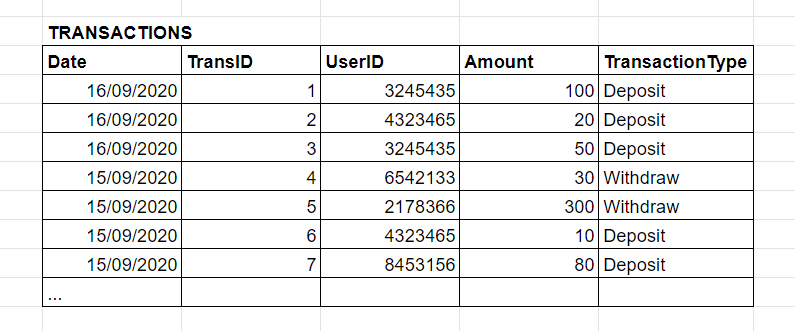

### 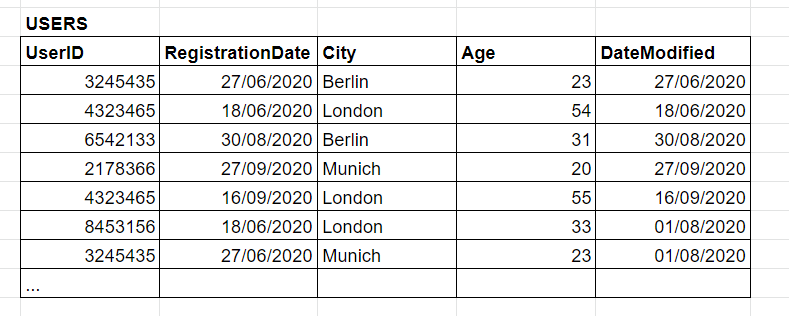

## Write a query which whenever I run it will return all the Users who made a deposit in the last 30 days from the day you run it.

In [ ]:
SELECT USERS.UserID, TRANSACTIONS.TransactionType, TRANSACTIONS.Date 

FROM USERS 

JOIN TRANSACTIONS ON USERS.UserID = TRANSACTIONS.UserID 

WHERE TransactionType='Deposit' 

AND  

TRANSACTIONS.Date > DATEADD(Day,-30,GETDATE()); 

## Write a query which sums transaction amount by date and user. There should be a column that sums deposits, another which sums withdrawals. Withdrawals should also be negative.

In [ ]:
SELECT t.UserID,  

SUM(CASE WHEN t.TransactionType ='Deposit' THEN t.Amount ELSE 0 END) As DepositSum, 

SUM(CASE WHEN t.TransactionType ='Withdraw' THEN t.Amount * -1 ELSE 0 END) As WithdrawalSum 

FROM TRANSACTIONS AS t 

GROUP BY t.Date, t.UserID; 

## Write query that sums and counts deposits per user registration date

In [ ]:
SELECT u.UserId, u.RegistrationDate,  

SUM(CASE WHEN t.Date = u.RegistrationDate THEN t.Amount END) AS DepositSum,  

COUNT(CASE WHEN t.Date = u.RegistrationDate THEN 1 ELSE null END) AS DepositCount,  

t.TransactionType 

FROM USERS as u, TRANSACTIONS AS t 

WHERE t.TransactionType='Deposit' 

GROUP BY u.RegistrationDate, u.UserID, t.TransactionType; 

## Write a query that shows all the users and their latest information.

In [ ]:
SELECT u.*,  

t.TransactionType, 

t.Date, 

t.Amount, 

SUM(CASE WHEN t.TransactionType ='Deposit' THEN t.Amount ELSE 0 END) As DepositSum,  

SUM(CASE WHEN t.TransactionType ='Withdraw' THEN t.Amount * -1 ELSE 0 END) As WithdrawalSum  

FROM USERS AS u 

INNER JOIN TRANSACTIONS AS t  

ON u.UserID = t.UserID 

INNER JOIN (SELECT tt.UserID, MAX(tt.Date) as Latest  

            FROM TRANSACTIONS tt  

           GROUP BY tt.UserID) AS d 

ON u.UserID = d.UserID AND t.Date = d.Latest 

GROUP BY u.UserID, u.Age, u.City, u.RegistrationDate, u.DateModified, t.Date, t.TransactionType, t.Amount; 


# 2. ETL

## Write a CREATE TABLE statement for a new table that has all the columns from the Transactions AND Users tables joined together

In [ ]:
CREATE TABLE IF NOT EXISTS USERINFO AS 

(SELECT u.*, t.* 

FROM USERS AS u 

FULL OUTER JOIN TRANSACTIONS AS t 

ON u.UserID = t.UserID 

WHERE 1=2; 

SELECT u.*, t.Date, t.TransID, t.Amount, t.TransactionType INTO USERINFO  

FROM USERS AS u  

FULL OUTER JOIN TRANSACTIONS AS t 

ON u.UserId = t.UserId; 

## Write an INSERT statement that populates data into this new table

In [ ]:
INSERT INTO USERINFO 

VALUES 

(3245438, '06/11/2020', 'Berlin', 44, '06/11/2020',  '06/11/2020', 1, 100, 'Deposit'); 